## 対象者
* 外資系コンサルのスライド作成術の読者  
* pythonを使っているデータアナリスト、データサイエンティスト  
* 普段の分析からシームレスに分かり易い報告資料を作りたい人  
* エクセルで作図したくない人

## 基本  
* ヒストグラム
* 折れ線グラフ  
* 棒グラフ    
* 積み上げ棒グラフ  
* 100%積み上げ棒グラフ  
* 円グラフ  
* 散布図  

## やや発展  
* 箱ひげ図
* 面積図  
* 滝グラフ  

## 発展 
* 地図上に可視化  
* 時系列メッシュ
* ダイナミックなグラフ  

## データ
* titanic  
* (ボストン(地図))  
* ashre(時系列、地図)  
* 

# Load

In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Titanic

### 観点
* 男女比(円グラフ)    
* 部屋の等級の比率(円グラフ → 棒グラフ？)   
* 生死、男女比 (帯グラフ)  
* 生死、等級
* 等級ごとの男女比 (棒グラフ並べる → 面積図)  
* 散布図、相関

In [248]:
df = pd.read_csv("../data/titanic/train.csv")

In [249]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [250]:
labels = df.Sex.unique()
labels

array(['male', 'female'], dtype=object)

In [273]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

# Sex

Index(['female', 'male'], dtype='object')
[314 577]


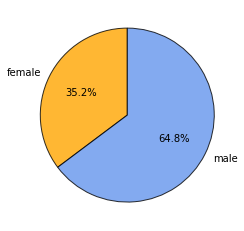

In [251]:
# 男女比
titanic_sex_count = df.Sex.value_counts(ascending=True)
print(titanic_sex_count.index)
print(titanic_sex_count.to_numpy())

fig, ax = plt.subplots() 
wedgeprops = {'alpha': 0.8, 'edgecolor': 'black', 'linewidth': 1}
ax.pie(x=titanic_sex_count.to_numpy(), 
      labels=titanic_sex_count.index,
      colors=['orange','cornflowerblue'],
      autopct='%1.1f%%',
      wedgeprops=wedgeprops,
      startangle=90)
plt.show()

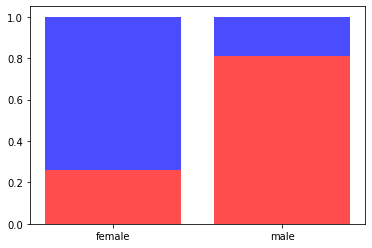

In [271]:
# 帯グラフ

df_sex_survived_count = df.groupby(["Sex", "Survived"]).count()['PassengerId'].reset_index().sort_values(["Sex", "Survived"])
df_sex_survived_count = df_sex_survived_count.rename(columns={"PassengerId":"count"})
stack1 = df_sex_survived_count[df_sex_survived_count['Survived']==0]['count'].to_numpy()
stack2 = df_sex_survived_count[df_sex_survived_count['Survived']==1]['count'].to_numpy()

stack1_p = stack1 / (stack1+stack2)
stack2_p = stack2 / (stack1+stack2)

fig, ax = plt.subplots()
ax.bar(x=df_sex_survived_count.Sex.unique().astype(str), height=stack1_p, bottom=0,color='red', alpha=0.7)#, color='red', label='Red')
ax.bar(x=df_sex_survived_count.Sex.unique().astype(str), height=stack2_p, bottom=stack1_p,color='blue', alpha=0.7)#, color='red', label='Red')
plt.show()

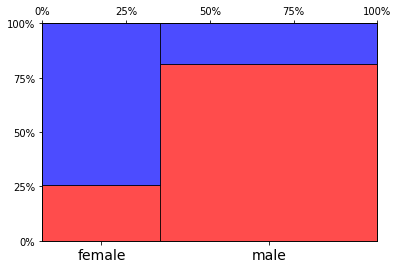

In [272]:
# https://towardsdatascience.com/marimekko-charts-with-pythons-matplotlib-6b9784ae73a1

fig, ax = plt.subplots(1)
y = stack1_p
x = titanic_sex_count.to_numpy()
x_label = titanic_sex_count.index.astype(str)
width = [i/sum(x) for i in x]
# calculate x coordinates based on the width of the previous bars
# same as: [0, width[0], width[0] + width[1], width[0] + width[1] + width[2]]
adjusted_x, temp = [0], 0
for i in width[:-1]:
    temp += i
    adjusted_x.append(temp)
# Marimekko chart
plt.bar(adjusted_x, y, width=width, align='edge', edgecolor='black',color='red', alpha=0.7)
plt.bar(adjusted_x, np.ones(len(y))-y, bottom=y, width=width, align='edge', edgecolor='black',color='blue', alpha=0.7)
# x and y ticks (%)

ax.set_xticks([(width[i]/2)+ v for i, v in enumerate(adjusted_x)])
ax.set_xticklabels(x_label, fontsize=14)
plt.ylim(0,1)
plt.xlim(0,1)
# twin y-axis to draw x-ticks at the top
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.set_yticklabels(['0%', '25%', '50%', '75%', '100%'])
axy = ax.twiny()
axy.set_xticks([0, 0.25, 0.5, 0.75, 1])
axy.set_xticklabels(['0%', '25%', '50%', '75%', '100%'])
plt.show()



# Pclass

Int64Index([2, 1, 3], dtype='int64')
[184 216 491]


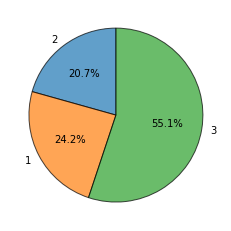

In [252]:
# 
titanic_pclass_count = df.Pclass.value_counts(ascending=True)
print(titanic_pclass_count.index)
print(titanic_pclass_count.to_numpy())

fig, ax = plt.subplots() 
wedgeprops = {'alpha': 0.7, 'edgecolor': 'black', 'linewidth': 1}
ax.pie(x=titanic_pclass_count.to_numpy(), 
      labels=titanic_pclass_count.index,
      autopct='%1.1f%%',
      wedgeprops=wedgeprops,
      startangle=90)
plt.show()

In [262]:
titanic_pclass_count = df.Pclass.value_counts().sort_index()
titanic_pclass_count


1    216
2    184
3    491
Name: Pclass, dtype: int64

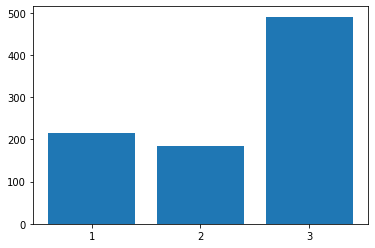

In [265]:
# 棒グラフで比較するのが良い
fig, ax = plt.subplots()
ax.bar(x=titanic_pclass_count.index.astype(str), 
       height=titanic_pclass_count.to_numpy())
plt.show()

In [266]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


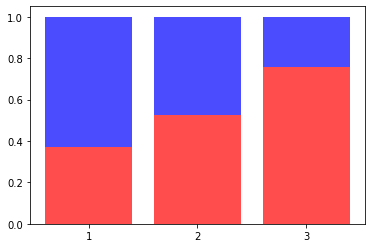

In [267]:
# 帯グラフ

df_pclass_survived_count = df.groupby(["Pclass", "Survived"]).count()['PassengerId'].reset_index().sort_values(["Pclass", "Survived"])
df_pclass_survived_count = df_pclass_survived_count.rename(columns={"PassengerId":"count"})
stack1 = df_pclass_survived_count[df_pclass_survived_count['Survived']==0]['count'].to_numpy()
stack2 = df_pclass_survived_count[df_pclass_survived_count['Survived']==1]['count'].to_numpy()

stack1_p = stack1 / (stack1+stack2)
stack2_p = stack2 / (stack1+stack2)

fig, ax = plt.subplots()
ax.bar(x=df_pclass_survived_count.Pclass.unique().astype(str), height=stack1_p, bottom=0,color='red', alpha=0.7)#, color='red', label='Red')
ax.bar(x=df_pclass_survived_count.Pclass.unique().astype(str), height=stack2_p, bottom=stack1_p,color='blue', alpha=0.7)#, color='red', label='Red')
plt.show()

In [242]:
# 実際に実数として何人死んでいるのかが伝わりにくい
# 3等の数自体が多いので、3等で死んでいる人はより多い
# fig, ax = plt.subplots()
# width = [1,2,2]
# a = [1,2,4]
# ax.bar(x=a, height=stack1_p, bottom=0, width=width, edgecolor='black',align='edge',color='red', alpha=0.7)#,align='edge')
# ax.bar(x=a, height=stack2_p, bottom=stack1_p, width=width, edgecolor='black',align='edge',color='blue', alpha=0.7)#,align='edge')
# plt.show()

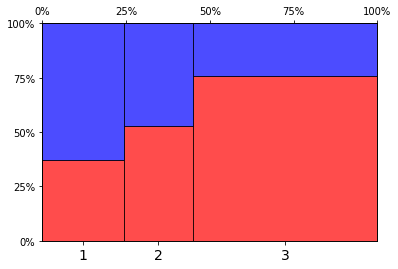

In [268]:
# https://towardsdatascience.com/marimekko-charts-with-pythons-matplotlib-6b9784ae73a1

fig, ax = plt.subplots(1)
y = stack1_p
x = titanic_pclass_count.to_numpy()
x_label = titanic_pclass_count.index.astype(str)
width = [i/sum(x) for i in x]
# calculate x coordinates based on the width of the previous bars
# same as: [0, width[0], width[0] + width[1], width[0] + width[1] + width[2]]
adjusted_x, temp = [0], 0
for i in width[:-1]:
    temp += i
    adjusted_x.append(temp)
# Marimekko chart
plt.bar(adjusted_x, y, width=width, align='edge', edgecolor='black',color='red', alpha=0.7)
plt.bar(adjusted_x, np.ones(len(y))-y, bottom=y, width=width, align='edge', edgecolor='black',color='blue', alpha=0.7)
# x and y ticks (%)

ax.set_xticks([(width[i]/2)+ v for i, v in enumerate(adjusted_x)])
ax.set_xticklabels(x_label, fontsize=14)
plt.ylim(0,1)
plt.xlim(0,1)
# twin y-axis to draw x-ticks at the top
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.set_yticklabels(['0%', '25%', '50%', '75%', '100%'])
axy = ax.twiny()
axy.set_xticks([0, 0.25, 0.5, 0.75, 1])
axy.set_xticklabels(['0%', '25%', '50%', '75%', '100%'])
plt.show()


# Age

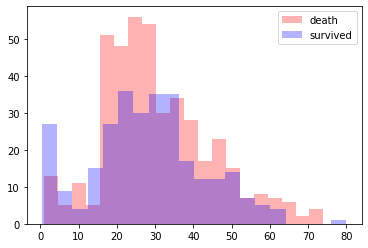

In [291]:
# ヒストグラム
fig, ax = plt.subplots(1)

ax.hist(df[df['Survived']==0].Age.to_numpy(), color='red', alpha=0.3, bins=20, label="death")
ax.hist(df[df['Survived']==1].Age.to_numpy(), color='blue', alpha=0.3, bins=20, label="survived")


plt.legend()
plt.show()

# fare

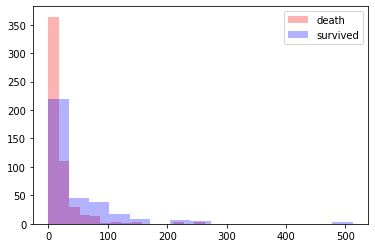

In [294]:
fig, ax = plt.subplots(1)

ax.hist(df[df['Survived']==0].Fare.to_numpy(), color='red', alpha=0.3, bins=15, label="death")
ax.hist(df[df['Survived']==1].Fare.to_numpy(), color='blue', alpha=0.3, bins=15, label="survived")


plt.legend()
plt.show()